In [322]:
import disruptive as dt
import matplotlib.pyplot as plt
from scipy.interpolate import griddata,Rbf
import numpy as np

In [323]:
project_id='c1qprqlh2t8g02sfoq30'
dt.default_auth = dt.Auth.service_account('C73lmqav1410008ofpvg', 'a97dd7320f7845b7b6c7e2499f9e03c9','c73llpqv1410008ofpug@c1qprqlh2t8g02sfoq30.serviceaccount.d21s.com')

#CloudConnector=blvjthsc0001nr3n4nt0


sensor = dt.Device.get_device('bjmghou7kro000cp4gng')


device_ids=['bjihp8m7kro000cp1tug','bu6oa4uptglg00ehc5b0','bjmd4i5p0jt000a5cldg','bu6onheptglg00ehcfag','bjihev8pismg008hrkig',
'bv8t0aqvje9g00eg5ma0','bjqhdclntbig00f92te0','bjqheb5ntbig00f92tng', 'bu6oqm988ueg00albpbg','bu6o15p88ueg00alb6c0', 'bjihd467gpvg00cjpb1g',
'btmsltc9kjug00dlsibg','bjiier0pismg008hru40', 'btmu2i5pna500081fju0','bjijkbe7kro000cp2feg','btou87tpna500081gi20',
'bv8stgs2ven000ch8k2g','bjihanlntbig00e44lc0','bu6nh7h88ueg00alaq2g','bjej76u7gpvg00cjoe20', 'bjejt50pismg008hqtf0',
'bjekggtp0jt000aqcsug','bjihmfe7kro000cp1t5g','bjii1qlntbig00e44s50','bjii8c7bluqg00dlv2gg','bjm1ft7bluqg00dlvrng',
'bjm2u6opismg008ht2a0','bjmgat7bluqg00dm1dt0','bjmgdle7gpvg00cjrvqg','bjmghou7kro000cp4gng','bjqhan67kro000cp7ojg',
'bjqhc85p0jt000a5gkg0','bt3nmnj853cg00fllacg']

sensorList=[]
event_type=[]
sensorList2=[]

sensors=[]
Sensor_Values={}

for devices in device_ids: 
    sensor = dt.Device.get_device(devices) 
    if sensor.display_name!=None:
        sensorList.append(sensor.display_name)


########################################################
        device_type=sensor.device_type


    

        if device_type=='proximity':
            device_type='object_present'
            sensors=sensor.reported.object_present.state
        
        elif device_type=='temperature':
            sensors=sensor.reported.temperature.celsius
        
        elif device_type=='humidity':
            sensors=sensor.reported.humidity.relative_humidity,sensor.reported.humidity.celsius

        elif device_type=='waterDetector':
            sensors=sensor.reported.water_present.state

        else:
            None

        Sensor_Values[sensor.display_name]={'Value':sensors,
        'Type':sensor.device_type}


In [324]:
start,end_x,end_y=0,8.4,8.1

#GF
GF_down=start,3.15,end_x
GF_left=start,3,5.25,end_y
GF_up=start,4.29,end_x
GF_right=start,5.25,end_y

#FF
FF_down=start,3.6,end_x
FF_left=GF_left
FF_up=start,3.15,6.3,end_x
FF_right=start,3,end_y

#SF
SF_down=start,end_x
SF_left=0,5.25,end_y
SF_up=start,3.25,end_x
SF_right=start,end_y
Fireplace_=SF_down[1]/2,SF_left[1]-1,SF_down[1]/2,SF_left[1]


GF_Room=GF_down,GF_left,0,0
GF_Bod=GF_up,GF_left,0,2
GF_Bath=GF_up,GF_right,1,1
Ungdomsavdeling=GF_down,GF_right,1,0
Stair=GF_down,GF_left,0,1

GuestRoom=FF_down,FF_left,0,0
MainBedRoom=FF_down,FF_right,1,0
FF_Soveroom=FF_up,FF_right,2,1
FF_Bath=FF_up,FF_left,0,2
Entre=FF_up,FF_right,0,1,FF_Bath

Office=SF_up,SF_left,0,1
LivingRoom=SF_up,SF_right,0,0,Office

Fireplace=Fireplace_,Fireplace_,0,0

In [325]:
def Square_room(room):
    return room[0][room[2]],room[1][room[3]],room[0][room[2]+1],room[1][room[3]+1]

def Not_square_room(room):
    return room[0][room[2]],room[1][room[3]],room[0][room[2]+2],room[1][room[3]+1],Square_room(room[4])

In [343]:

#for device in device_ids:

a_l=0.2       #Just to make sure that the sensor is not in the wall
# GF

#Coords
Sensor_Values["0BRoom"]['coords']=          [GF_down[1]/2,GF_left[1]-a_l]
Sensor_Values["0BTFloor"]['coords']=        [GF_down[2]-a_l,GF_right[1]*3/4]
Sensor_Values["0BTCeiling"]['coords']=      [GF_down[2],GF_right[1]*3/4-a_l]

Sensor_Values["0BathroomWater"]['coords']=  [GF_up[1]+a_l,GF_right[2]-2*a_l]

Sensor_Values["0BDoor"]['coords']=          [GF_down[1],GF_left[2]-2*a_l]

Sensor_Values['0BGuestDoor']['coords']=     [GF_down[1],3*a_l]

# Sensor_Values['0BodWater']['coords']=       [GF_up[1]-3*a_l,GF_left[2]+3*a_l]

#Room
Sensor_Values["0BRoom"]['room']=            ['GF_Room']

Sensor_Values["0BTFloor"]['room']=          ['Ungdomsavdeling']
Sensor_Values["0BTCeiling"]['room']=        ['Ungdomsavdeling']

Sensor_Values["0BathroomWater"]['room']=    ['GF_Bath']


Sensor_Values["0BDoor"]['room']=            ['Stairs','Ungdomsavdeling']
Sensor_Values['0BGuestDoor']['room']=       ['GF_Room','Ungdomsavdeling']


#FF

#Coords
Sensor_Values["1Entrance1"]['coords']=      [FF_up[1]+a_l,FF_left[3]-a_l]
Sensor_Values["1Stair bottom"]['coords']=   [GF_down[1]/2+a_l,(GF_left[2]-GF_left[1])/2+GF_left[1]+2*a_l]
Sensor_Values["1Entrance2"]['coords']=      [FF_down[1]-2*a_l,FF_left[1]+a_l]
Sensor_Values["1GuestRoom"]['coords']=      [a_l,FF_left[1]/2]
Sensor_Values["1MainRoom"]['coords']=       [FF_down[2]-a_l,FF_right[1]/2]

Sensor_Values["1MainBRHum"]['coords']=      [FF_down[1]+(FF_down[2]-FF_down[1])/2-a_l,FF_right[1]-a_l]

Sensor_Values["1MainDoor"]['coords']=       [FF_up[1]+2*a_l,FF_left[3]]
Sensor_Values["1BathRoomWatet"]['coords']=  [3*a_l,GF_left[2]+a_l]
Sensor_Values["1OutdoorEntrance"]['coords']=[FF_down[1]-2*a_l,FF_left[3]+a_l]


#Room
Sensor_Values["1Entrance1"]['room']=        ['Entre']
Sensor_Values["1Stair bottom"]['room']=     ['Entre']
Sensor_Values["1Entrance2"]['room']=        ['Entre']


Sensor_Values["1GuestRoom"]['room']=        ['GuestRoom']

Sensor_Values["1MainRoom"]['room']=         ['MainBedRoom']
Sensor_Values["1MainBRHum"]['room']=        ['MainBedRoom']
Sensor_Values["1OutdoorEntrance"]['room']=  ['Out']

Sensor_Values["1MainDoor"]['room']=         ['Out','Entre']
Sensor_Values["1BathRoomWatet"]['room']=    ['FF_Bath']      #Yes Watet


#SF
Sensor_Values["2OfficeDesk"]['coords']=[5*a_l,SF_left[2]-2*a_l]
Sensor_Values["2Stair"]['coords']=[SF_up[1]/2+3*a_l,(SF_left[2]-SF_left[1])/2+SF_left[1]+2*a_l]
Sensor_Values["2LivingRoomCenter"]['coords']=[SF_down[1]/2+a_l,SF_right[1]/2]
Sensor_Values["2LRWindow"]['coords']=[SF_down[1]/2+2*a_l,2*a_l]
Sensor_Values["2Cooking"]['coords']=[a_l,SF_left[1]/2-2*a_l]
Sensor_Values["2Fireplace"]['coords']=[SF_down[1]/2+a_l,SF_left[1]+a_l]
Sensor_Values["2BalconyEntrance"]['coords']=[SF_up[1]+5*a_l,SF_right[1]]
Sensor_Values["2LivingRoomHumidifier"]['coords']=[SF_down[1]/2+a_l,SF_left[1]-2*a_l]

Sensor_Values["2LivingRoomCenterHumidity"]['coords']=[SF_down[1]-a_l,SF_right[1]/2-4*a_l]
Sensor_Values["KitchenSinkWater"]['coords']=[10*a_l,2*a_l]
Sensor_Values["2FirePlaceDoor"]['coords']=[SF_down[1]/2,SF_left[1]-5*a_l]
Sensor_Values["2OfficeDoor"]['coords']=[SF_up[1]-3*a_l,SF_left[1]]

#room

Sensor_Values["2OfficeDesk"]['room']=['Office']

Sensor_Values["2Stair"]['room']=['LivingRoom']
Sensor_Values["2LivingRoomCenter"]['room']=['LivingRoom']
Sensor_Values["2LRWindow"]['room']=['LivingRoom']
Sensor_Values["2Cooking"]['room']=['LivingRoom']
Sensor_Values["2Fireplace"]['room']=['Fireplace']
Sensor_Values["2BalconyEntrance"]['room']=['LivingRoom']

Sensor_Values["2LivingRoomHumidifier"]['room']=['LivingRoom']

Sensor_Values["2LivingRoomCenterHumidity"]['room']=['LivingRoom']
Sensor_Values["KitchenSinkWater"]['room']=['LivingRoom']
Sensor_Values["2FirePlaceDoor"]['room']=['LivingRoom','Fireplace']
Sensor_Values["2OfficeDoor"]['room']=['LivingRoom','Office']


In [327]:
# Define a dictionary to store the sensors in each room
room_sensors = {}

# Loop over the devices
for device in sensorList:
    if len(Sensor_Values[device]['room'])==1:
        # Get the room name
        room_name = Sensor_Values[device]['room'][0]

        # Check if the room exists in the dictionary
        if room_name not in room_sensors:
            # If not, add an empty list for that room
            room_sensors[room_name] = []
        
        # Add the sensor to the list of sensors for that room
        room_sensors[room_name].append(device)
    else:
        # Get the room name
        room_name = Sensor_Values[device]['room'][0]
        # Check if the room exists in the dictionary
        if room_name not in room_sensors:
            # If not, add an empty list for that room
            room_sensors[room_name] = []
        
        # Add the sensor to the list of sensors for that room
        room_sensors[room_name].append(device)

        room_name = Sensor_Values[device]['room'][1]

        if room_name not in room_sensors:
            # If not, add an empty list for that room
            room_sensors[room_name] = []
        
        # Add the sensor to the list of sensors for that room
        room_sensors[room_name].append(device)


In [344]:
# Define the room coordinates
room_coords = {'GF_Room': GF_Room,
               'GF_Bod': GF_Bod,
               'GF_Bath': GF_Bath,
               'Ungdomsavdeling':Ungdomsavdeling,
               'Stairs': Stair,
               'GuestRoom':GuestRoom,
               'MainBedRoom':MainBedRoom,
               'FF_Soverom':FF_Soveroom,
               'FF_Bath':FF_Bath,
               'Entre':Entre,
               'Office':Office,
               'LivingRoom':LivingRoom,
               'Fireplace':Fireplace
}

FF=GuestRoom,MainBedRoom,FF_Soveroom,FF_Bath,Entre
GF=GF_Room,GF_Bod,GF_Bath,Ungdomsavdeling,Stair
SF=Office,LivingRoom,Fireplace

Floor={1:['GF_Room','GF_Bod','GF_Bath','Ungdomsavdeling','Stairs'],
        2:['GuestRoom','MainBedRoom','FF_Soverom','FF_Bath','Entre'],
        3:['Office','LivingRoom','Fireplace']
}

In [329]:
N=30
def room_grid(room):
    if len(room_coords[room])<5:
        a=Square_room(room_coords[room])
        xgrid,ygrid=np.meshgrid(np.linspace(a[0],a[2],N),np.linspace(a[1],a[3],N))
        grid=np.column_stack((xgrid.ravel(),ygrid.ravel()))
        return grid,xgrid,ygrid,np.nan,np.nan
    else:
        a=Not_square_room(room_coords[room])
        xgrid,ygrid=np.meshgrid(np.linspace(a[0],a[2],N),np.linspace(a[1],a[3],N))
        a=a[4]
        i=0
        j=0
        I=[]
        J=[]
        for j in range(N):
            for i in range(N):
                if xgrid[2][i]<=a[2] and xgrid[2][i]>=a[0] and ygrid[:,-1][j]<=a[3] and ygrid[:,-1][j]>=a[1]:
                    # Create a mask for the indexes you want to mask
                    I.append(i)
                    J.append(j)  
        grid=np.column_stack((xgrid.ravel(),ygrid.ravel()))
        return grid,xgrid,ygrid,I,J



In [330]:
def idw(x,y,v,xi,yi,p=2):

    v=np.array(v)
    interp2=weights_list=np.zeros((N,N))
    if len(x)>0:
        for i in range(len(x)):
            dist = np.sqrt((x[i]-xi)**2 + (y[i]-yi)**2)

            weights=1/dist**p

            weights/=np.sum(weights)

            weights_list=np.add(weights,weights_list)
    
            interp2=np.add(weights*v[i],interp2)
    else:
        return interp2

    interp=interp2/weights_list
    return interp

room='Office'
sensor_coord=[]
sensor_value_temp=[]
sensor_in_room=room_sensors[room]
for sensor in sensor_in_room:
    if Sensor_Values[sensor]['Type']=='temperature':
        sensor_value_temp.append(Sensor_Values[sensor]['Value'])
        sensor_coord.append(Sensor_Values[sensor]['coords'])
x=[coord[0] for coord in sensor_coord]
y=[coord[1] for coord in sensor_coord]

In [355]:
# for a event:

def interpolate(room,I,J):
    sensor_coord=[]
    sensor_value_temp=[]
    sensor_door=[]
    sensor_value_water=[]
    sensor_waterDetector=[]
    max_humidity=40
    if room not in room_sensors:
        return [1,],[],[]
    sensor_in_room=room_sensors[room]
    for sensor in sensor_in_room:
        if Sensor_Values[sensor]['Type']=='temperature':
            sensor_value_temp.append(Sensor_Values[sensor]['Value'])
            sensor_coord.append(Sensor_Values[sensor]['coords'])
        elif Sensor_Values[sensor]['Type']=='proximity':
            if Sensor_Values[sensor]['Value']=='PRESENT':
                if Sensor_Values[sensor]['room'][0]==room:
                    i=1
                else:
                    i=0
                if sensor not in sensor_door:
                    sensor_door.append(sensor)
                    sensor_in_room2=room_sensors[Sensor_Values[sensor]['room'][i]]
                    for sensor in sensor_in_room2:
                        if Sensor_Values[sensor]['Type']=='temperature':
                            sensor_value_temp.append(Sensor_Values[sensor]['Value'])
                            sensor_coord.append(Sensor_Values[sensor]['coords'])

        elif Sensor_Values[sensor]['Type']=='humidity':
            sensor_value_temp.append(Sensor_Values[sensor]['Value'][1])
            sensor_coord.append(Sensor_Values[sensor]['coords'])
            if Sensor_Values[sensor]['Value'][0]>max_humidity:
                sensor_value_water.append(Sensor_Values[sensor]['coords'])
                sensor_value_water.append(Sensor_Values[sensor]['Value'][0])
                sensor_value_water.append(sensor)
                                
        elif Sensor_Values[sensor]['Type']=='waterDetector':
            if Sensor_Values[sensor]['Value']=='PRESENT':
                sensor_waterDetector.append(Sensor_Values[sensor]['coords']) 
    # if len(sensor_value_temp)==1:   
    #     interpolated_temp=np.ones_like(room_grid(room)[1])*sensor_value_temp[0]
    # elif len(sensor_value_temp)==0:
    #     interpolated_temp=[1]
    # else:
    #     interpolated_temp_near=griddata(sensor_coord,sensor_value_temp,room_grid(room)[0],method='nearest')
    #     if len(sensor_value_temp)<3:
    #         return interpolated_temp_near,sensor_waterDetector, sensor_value_water
        # x=[coord[0] for coord in sensor_coord]
        # y=[coord[1] for coord in sensor_coord]

    #     # interpolated_temp= idw(x,y,sensor_value_temp,room_grid(room)[1],room_grid(room)[2])
    #     interpolated_temp=griddata(sensor_coord,sensor_value_temp,room_grid(room)[0],method='linear',fill_value=0)

    #     try:
    #         rbfi=Rbf(x,y,sensor_value_temp)
    #         interpolated_temp_rbf=rbfi(room_grid(room)[1],room_grid(room)[2])
    #         interpolated_temp_rbf=np.reshape(interpolated_temp_rbf,N*N,)
    #     except:
    #         interpolated_temp_rbf=interpolated_temp_near
    #     for i in range(len(interpolated_temp)):
    #         if interpolated_temp[i]==0:
    #             interpolated_temp[i]=interpolated_temp_rbf[i]
    #     try:
    #         for k in range(len(I)):
    #             interpolated_temp[I[k]+J[k]*N]=None
    #     except:
    #         None
    x=[coord[0] for coord in sensor_coord]
    y=[coord[1] for coord in sensor_coord]
    interpolated_temp=idw(x,y,sensor_value_temp, room_grid(room)[1],room_grid(room)[2])
    if len(room_coords[room])>4:
        for k in range(len(I)):
            interpolated_temp[J[k],I[k]]=None

    return interpolated_temp,sensor_waterDetector,sensor_value_water

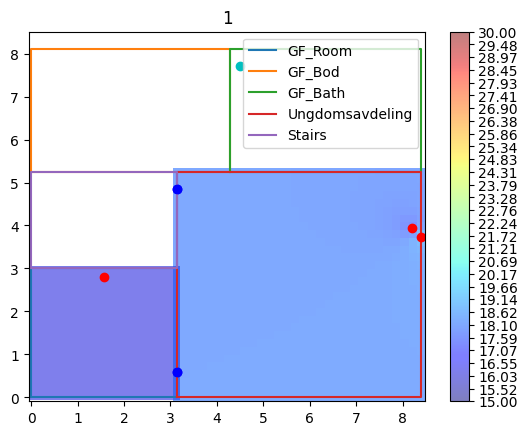

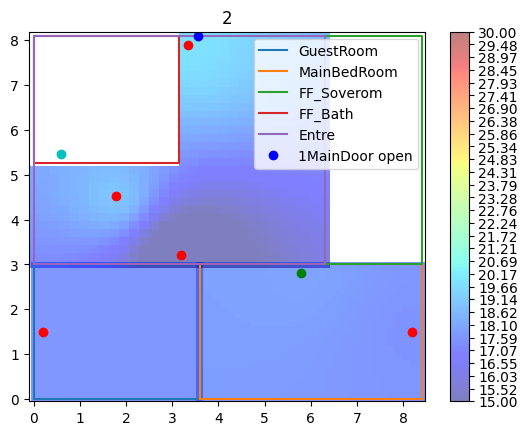

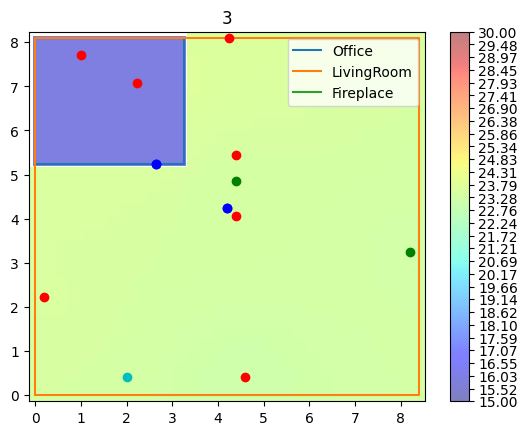

In [361]:
i=0
fig = plt.figure()  # Create a new figure object
ax = fig.add_subplot(111)  # Add a new subplot to the figure
for floor in Floor:
    i+=1
    for room in Floor[floor]:
        temp=[]
        if len(room_coords[room])<5:
            a=Square_room(room_coords[room])
        else:
            a=Not_square_room(room_coords[room])
        x_coords=a[0],a[2],a[2],a[0],a[0]
        y_coords=a[1],a[1],a[3],a[3],a[1]
        plt.figure(i)
        plt.plot(x_coords,y_coords, label=room)
        plt.legend()
        if room in room_sensors:
            S_V=room_sensors[room]
            for sensor in S_V:
                sensor_coord=Sensor_Values[sensor]['coords']
                sensor_name=sensor
                x=sensor_coord[0]
                y=sensor_coord[1]
                if Sensor_Values[sensor]['Type']=='temperature':
                    plt.plot(x,y,'ro')
                elif Sensor_Values[sensor]['Type']=='proximity':
                    if Sensor_Values[sensor]['Value']=='PRESENT':
                        label=str(sensor)+' open'
                    else:
                        label=None
                    plt.plot(x,y,'bo',label=label)
                elif Sensor_Values[sensor]['Type']=='humidity':
                    plt.plot(x,y,'go')
                elif Sensor_Values[sensor]['Type']=='waterDetector':
                    plt.plot(x,y,'co')
                plt.legend(loc='upper right')
        vmin=15
        vmax=30
        grid=room_grid(room)
        xi,yi=grid[1],grid[2]
        plt.figure(i)
        plt.title(str(floor))
        z0=interpolate(room,grid[3],grid[4])
        z=z0[0]
        if np.sum(z)<5:
            z_2d=None
        else:
            plt.pcolormesh(xi,yi,z,shading='auto',vmin=vmin,vmax=vmax,cmap='jet', alpha=0.5)

        if len(z0[1])==0:
            None
        else:
            print('Water detected in '+str(room))
            plt.plot(z0[1][0][0],z0[1][0][1],'bo',label='Water Detected')

        if len(z0[2])==0:
            None

        else:
            for j in range(2):
                textr='Humidity in '+str(room)+ ' is higher than recomended'
                props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
                plt.plot(z0[2][3*j][0],z0[2][3*j][1],'co',label='Here')
            plt.text(-0.05,0.1, textr, transform=ax.transAxes, fontsize=10, verticalalignment='bottom', bbox=props)

    levels = np.linspace(vmin, vmax, 30)
    plt.colorbar(ticks=levels)
    plt.show()  


In [360]:
import io
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg
from PIL import Image
from utils import plt_fig_to_pil

In [334]:

def heatmap(nr):
    Floor = {
        1: ['GF_Room', 'GF_Bod', 'GF_Bath', 'Ungdomsavdeling', 'Stairs'],
        2: ['GuestRoom', 'MainBedRoom', 'FF_Soverom', 'FF_Bath', 'Entre'],
        3: ['Office', 'LivingRoom', 'Fireplace']
    }
    fig = plt.figure()
    ax = fig.add_subplot(111)  # Add a new subplot to the figure
    for room in Floor[nr]:
        if len(room_coords[room]) < 5:
            a = Square_room(room_coords[room])
        else:
            a = Not_square_room(room_coords[room])
        x_coords = a[0], a[2], a[2], a[0], a[0]
        y_coords = a[1], a[1], a[3], a[3], a[1]
        plt.figure(1)
        plt.plot(x_coords, y_coords, label=room)
        try:
            S_V = room_sensors[room]
            for sensor in S_V:
                sensor_coord = Sensor_Values[sensor]['coords']
                x = sensor_coord[0]
                y = sensor_coord[1]
                if Sensor_Values[sensor]['Type'] == 'temperature':
                    plt.plot(x, y, 'ro')
                elif Sensor_Values[sensor]['Type'] == 'proximity':
                    plt.plot(x, y, 'go')
                elif Sensor_Values[sensor]['Type'] == 'humidity':
                    plt.plot(x, y, 'co')
                elif Sensor_Values[sensor]['Type'] == 'waterDetector':
                    plt.plot(x, y, 'bo')
        except:
            None
        vmin = 10
        vmax = 30
        grid = room_grid(room)
        xi, yi = grid[1], grid[2]
        plt.figure(1)
        plt.title('Floor '+str(nr-1))
        z0 = interpolate(room, grid[3], grid[4])
        z = z0[0]
        if np.sum(z)<5:
            None
        else:
            plt.pcolormesh(xi, yi, z, shading='auto', vmin=vmin,
                       vmax=vmax, cmap='jet', alpha=0.5)
        if len(z0[1]) == 0:
            None
        else:
            textr = 'Water Detected! in '+str(room)
            props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
            plt.text(0.1, 0.1, textr, transform=ax.transAxes,
                     fontsize=10, verticalalignment='bottom', bbox=props)
        if len(z0[2]) == 0:
            None
        else:
            for j in range(2):
                textr = 'Humidity in '+str(room) + ' is higher than recomended'
                props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
            plt.text(0.1, 0.1, textr, transform=ax.transAxes,
                     fontsize=10, verticalalignment='bottom', bbox=props)

    levels = np.linspace(vmin, vmax, 30)
    plt.colorbar(ticks=levels)

    img = plt_fig_to_pil(fig)
    plt.show()
    return img


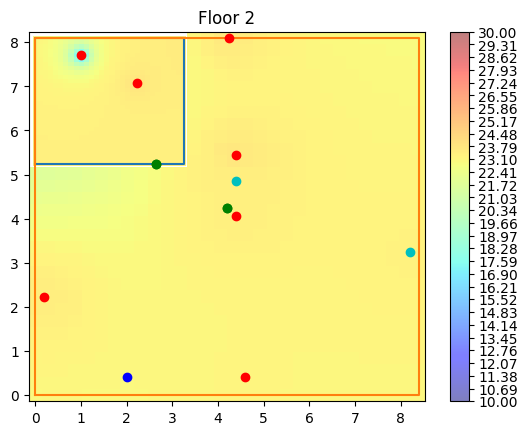

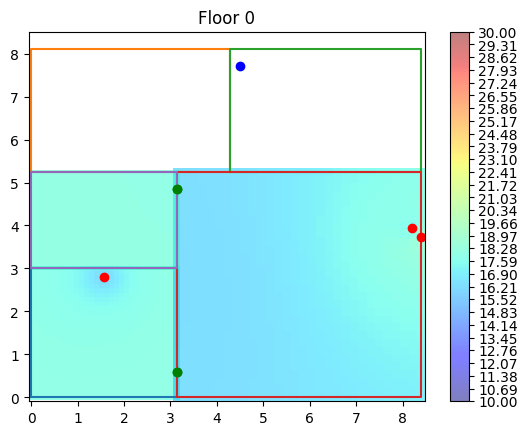

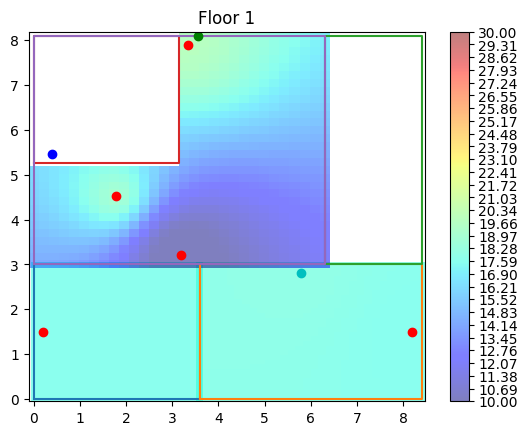

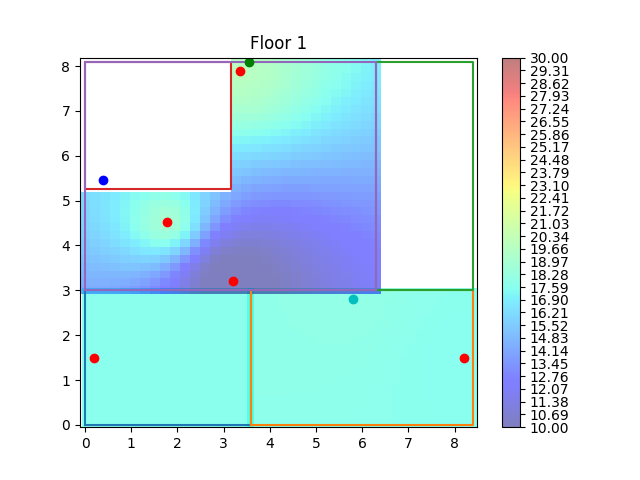

In [342]:
heatmap(3)
heatmap(1)
heatmap(2)